<a href="https://colab.research.google.com/github/gokturkberke/tensorflow-deeplearning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

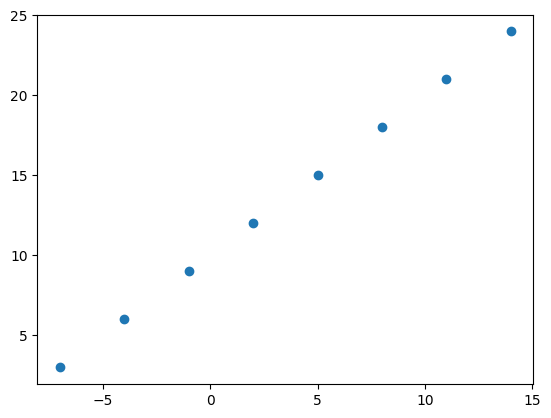

In [2]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1],y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
#Turn our Numpy Arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

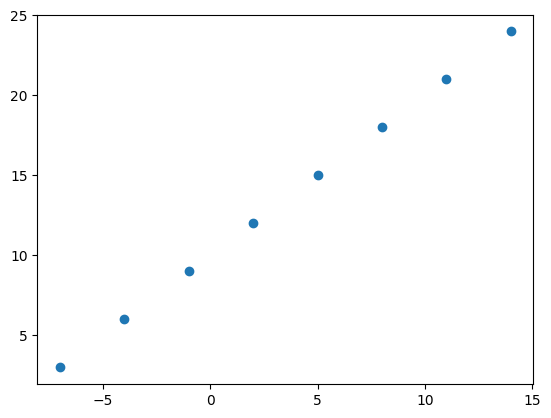

In [11]:
plt.scatter(X,y)

#Steps in modelling TensorFlow

1. Creating a model - define the input and output layers as well as the hidden layers of a deep learning model
2. Compiling a model define the loss function and the optimizer and evaluation metrics
3. Fitting a model - letting the model try to find patterns between X & y


1.   Loss = How wrong your models predictions compared to the truth label
2.   Optimizer = How your model should update its internal paterns to better its predictions
3.   Metrics = Human interpretable values for how well your model is doing




In [12]:
tf.random.set_seed(42)
# Create the model using Sequential API
model = tf.keras.Sequential([ #sequential katmanlari sirayla(ardisik) eklemek icin kullanilan model tipi
    tf.keras.layers.Dense(1) #icinde 1 adet nöron var yani bu model giristeki veriyi alip tek bir cikti degeri uretir
])

#2. Compile the modle
model.compile(loss = tf.keras.losses.mae, # hata fonksiyonu mae
              optimizer = tf.keras.optimizers.SGD(),# sgd is short for stochastics gradient descent = agirliklari adim adim guncelleyerek kaybi azaltmaya calisir (ogrenme algoritmasi sgd)
              metrics=["mae"]) #egitim sirasinda takip etmek istedigimiz metrik
#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) #epochs = 5 tüm veri setini 5 kez bastan sona modelin gormesini sagliyoruz
#Burada axis=-1, sonuna yeni bir boyut ekliyor.

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.5000 - mae: 7.5000   
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 7.4944 - mae: 7.4944
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 7.4887 - mae: 7.4887
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 7.4831 - mae: 7.4831
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 7.4775 - mae: 7.4775


X = [1, 2, 3, 4]
X.shape → (4,)

tf.expand_dims(X, axis=-1).shape → (4, 1)
bu yuzden fitte tf.expand_dims kullaniyoruz

In [13]:
# Try and make prediction using our model
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [14]:
#Improving our model (options are adding more layers(number of tf.keras.layers.dense) change the activation function , increase the number of hidden units,change the optimization function,change the learning rate, fitting on more data , fitting for longer(epochs))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.8528 - mae: 14.8528   
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 14.7203 - mae: 14.7203
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 14.5878 - mae: 14.5878
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 14.4553 - mae: 14.4553
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 14.3228 - mae: 14.3228
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 14.1903 - mae: 14.1903
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 14.0578 - mae: 14.0578
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 13.9253 - mae: 13.9253
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 13.7928 - mae: 13.7928
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 13.6603 - mae: 13.6603
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 13.5278 - mae: 13.5278
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 13.3953 - mae: 13.3953
Epoch 13/100
1/1 ━

In [15]:
model.predict(tf.expand_dims([17.0],axis=-1)) #much more better

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[29.431662]], dtype=float32)

In [16]:
#This time with an extra hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss= "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - loss: 12.9231 - mae: 12.9231
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.4100 - mae: 12.4100
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.8892 - mae: 11.8892
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.3560 - mae: 11.3560
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.8054 - mae: 10.8054
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.2328 - mae: 10.2328
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.6331 - mae: 9.6331
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.0015 - mae: 9.0015
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.3298 - mae: 8.3298
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.6136 - mae: 7.6136
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.8464 - mae: 6.8464
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.0217 - mae: 6.0217
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [17]:
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[31.144133]], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), #changed to Adam also added learning rate
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step - loss: 13.8741 - mae: 13.8741
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.1308 - mae: 13.1308
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.3953 - mae: 12.3953
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.6669 - mae: 11.6669
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.9435 - mae: 10.9435
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.2216 - mae: 10.2216
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.4982 - mae: 9.4982
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.7705 - mae: 8.7705
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.0359 - mae: 8.0359
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.2915 - mae: 7.2915
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 6.7668 - mae: 6.7668
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.8780 - mae: 6.8780
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [19]:
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[28.073858]], dtype=float32)

## Evaluating a model

In [20]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
#Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

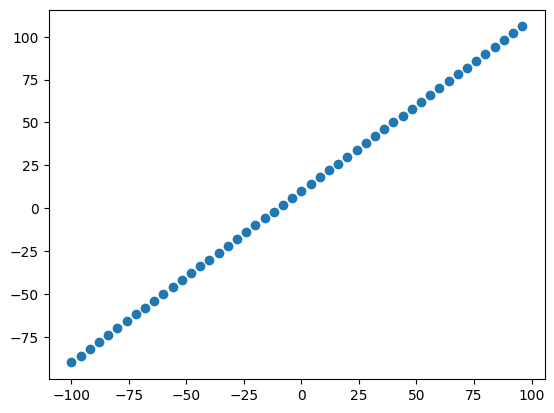

In [22]:
plt.scatter(X,y)

### The 3 sets

* **Training set** = the model learns from this data typically %70-80 of the total data
* **Validation set** - the model gets tuned on this data 10-15 % data
* **Test set** = the model gets evaluated typically 10-15 %

In [23]:
len(X)

50

In [24]:
#Split the data into train and test sets
X_train = X[:40] #first 40 training samples
y_train = y[:40]

X_test = X[40:] #last 10 testing samples
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

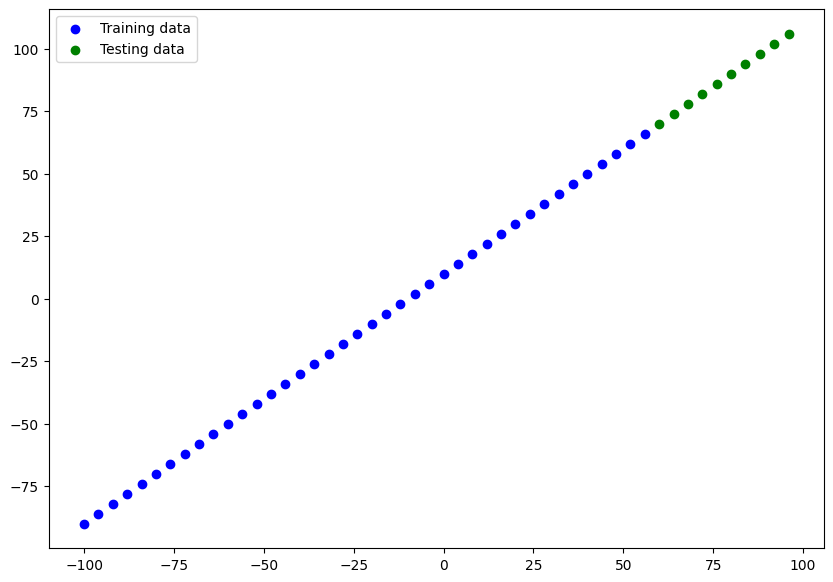

In [25]:
# Visualizing the data
plt.figure(figsize=(10,7)) #10 × 7 inç
#Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")

#Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")

#Show the legend
plt.legend();

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# model.fit(X_train,y_train,epochs=100)

In [27]:
print("X_train:", X_train.shape, X_train.dtype)
print("y_train:", y_train.shape, y_train.dtype)

X_train: (40,) <dtype: 'int32'>
y_train: (40,) <dtype: 'int32'>


In [28]:
X[0].shape,X[0],y[0]

(TensorShape([]),
 <tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [29]:

X_train = tf.reshape(X_train, [-1, 1])  # (40,) -> (40, 1)
y_train = tf.reshape(y_train, [-1, 1])  # (40,) -> (40, 1)

# Veri tiplerini float'a çevirin
X_train = tf.cast(X_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

print(f"X_train yeni shape: {X_train.shape}")
print(f"y_train yeni shape: {y_train.shape}")

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_2")

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)


X_train yeni shape: (40, 1)
y_train yeni shape: (40, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Parms =  total number of paramteres in the model
* Trainable paramters =  these are the parameters the model can update as it trains
* NON-trainable params = this is typical when you bring in already learn patterns or paramteres from other models during transfer learning!!

# Dense Katmanları — Parametre Hesabı ve Kısa Örnekler

**Parametre sayısı (Dense katmanı için):**

```
params = units * (input_dim + 1)   # +1 bias için
```

---

## Örnek 1 — Çok katmanlı model

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
    tf.keras.layers.Dense(1)
])
```

* İlk katman param = `100 * (1 + 1) = 200`
* İkinci katman param = `1 * (100 + 1) = 101`  (çünkü ikinci katmanın girdi boyutu 100)
* Toplam param = `301`

**model.summary() (örnek çıktı)**

```
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 100)               200
dense_1 (Dense)              (None, 1)                 101
=================================================================
Total params: 301
Trainable params: 301
Non-trainable params: 0
```

---

## Örnek 2 — Tek katmanlı model

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=[1])
])
```

* Parametre sayısı = `5 * (1 + 1) = 10`

**model.summary() (örnek çıktı)**

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 5)                 10
=================================================================
Total params: 10
Trainable params: 10
Non-trainable params: 0
```

---

## Kısa notlar

* Aktivasyon fonksiyonları (`relu`, `sigmoid`, vb.) **parametre sayısını değiştirmez**; sadece katmanın çıktısını nasıl hesapladığını etkiler.
* Çok büyük `units` sayıları modelin kapasitesini artırır ama **overfitting** riskini ve hesaplama maliyetini yükseltir.
* Giriş verin tek boyutluysa modele verirken `(n,1)` şekline getirin: örn. `X.reshape(-1,1)` veya `tf.expand_dims(X, -1)`.

---

Kopyala-yapıştır yapabileceğin tek sayfa metin bu şekilde hazır. İstersen bu metni Colab'a yapıştırdığında çalıştırılabilir kod blokları halinde de düzenleyeyim.


In [31]:
model.fit(X_train,y_train,epochs=100,verbose= 0) #verbose eğitim sırasında ekrana ne kadar bilgi yazdırılacağını kontrol eden parametre.
# 0 = hic bilgi yazdirmaz  2 sade satir bilgisi yazdirir bi tane

In [32]:
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

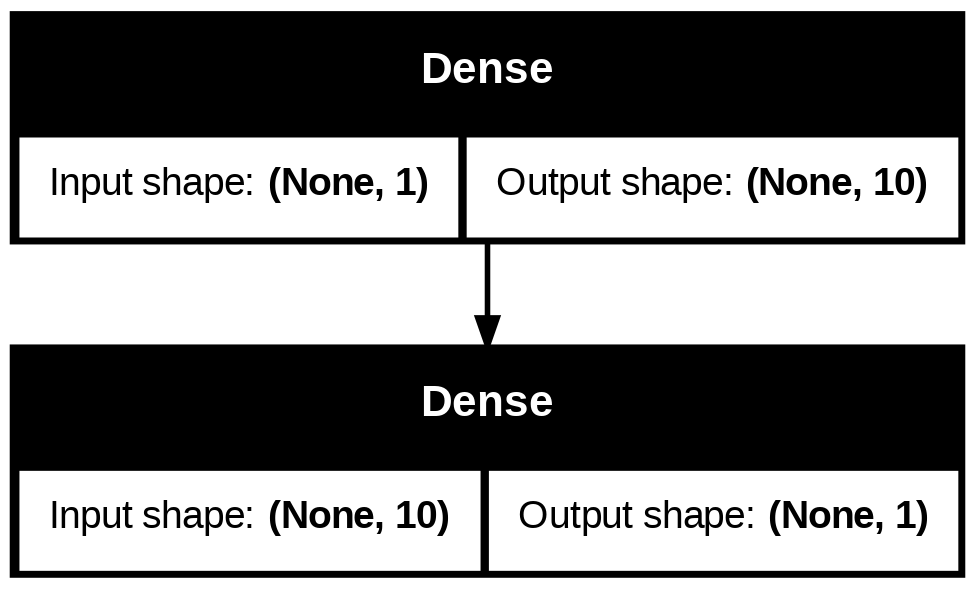

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes=True)

In [34]:
#Visualize the models predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[ 67.20059 ],
       [ 71.02525 ],
       [ 74.849915],
       [ 78.67456 ],
       [ 82.49923 ],
       [ 86.323875],
       [ 90.14853 ],
       [ 93.9732  ],
       [ 97.797844],
       [101.6225  ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")

  #Plot test data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")

  #plot models predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")

  #Show the legend
  plt.legend();

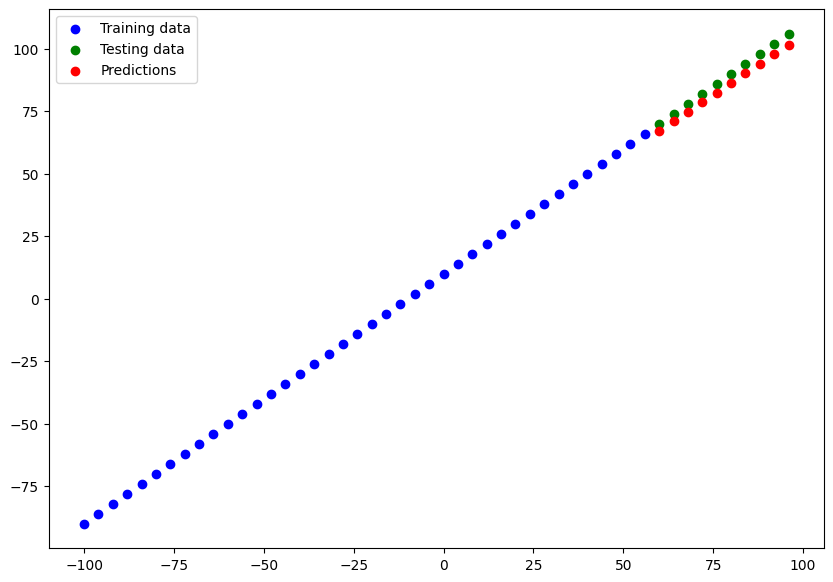

In [37]:
plot_predictions()

### Evaluating our models predictions with regression evaluation metrics

In [38]:
# two main metrics MAE - mean absolute error and MSE - mean square error HUBER = combination of MSE AND MAE
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 3.5885 - mae: 3.5885


[3.5884506702423096, 3.5884506702423096]

In [39]:
y_pred

array([[ 67.20059 ],
       [ 71.02525 ],
       [ 74.849915],
       [ 78.67456 ],
       [ 82.49923 ],
       [ 86.323875],
       [ 90.14853 ],
       [ 93.9732  ],
       [ 97.797844],
       [101.6225  ]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
#Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(y_test, y_pred).numpy()
mae


np.float32(3.5884507)

In [42]:
mae = tf.keras.metrics.MeanAbsoluteError()(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.5884506702423096>

In [43]:
#Calculate the mean square error
mse = tf.keras.metrics.MeanSquaredError()(y_test,y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.130627632141113>

### Running experiments to improve our model

1. Get more data - get more examples for your model
2. Make your model larger
3. Train for longer

In [44]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 49.2551 - mae: 49.2551 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16.4235 - mae: 16.4235
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.1464 - mae: 10.1464
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.6763 - mae: 7.6763
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.0238 - mae: 12.0238
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.1959 - mae: 8.1959
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.8467 - mae: 8.8467
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.8028 - mae: 7.8028
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.7589 - mae: 10.7589
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.6098 - mae: 7.6098
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.9309 - mae: 11.9309
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.1139 - mae: 8.1139
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


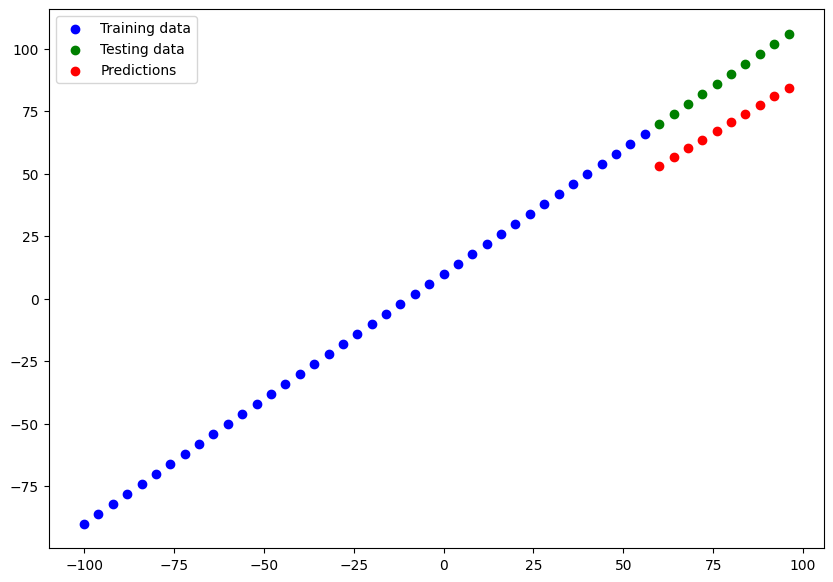

In [45]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [46]:
mae_1 = tf.keras.metrics.MeanAbsoluteError()(y_test,y_pred_1)
mse_1 = tf.keras.metrics.MeanSquaredError()(y_test,y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=19.15347671508789>,
 <tf.Tensor: shape=(), dtype=float32, numpy=369.27099609375>)

In [47]:
# Build model_2 (2 dense layers trained for 100 epochs)

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 31.6241 - mae: 31.6241 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18.7900 - mae: 18.7900
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.0448 - mae: 4.0448
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.4255 - mae: 8.4255 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.3459 - mae: 12.3459
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 14.0723 - mae: 14.0723 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.3936 - mae: 7.3936
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.0909 - mae: 12.0909 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.1116 - mae: 14.1116
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.8924 - mae: 9.8924
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.6759 - mae: 7.6759
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.5532 - mae: 11.5532 
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


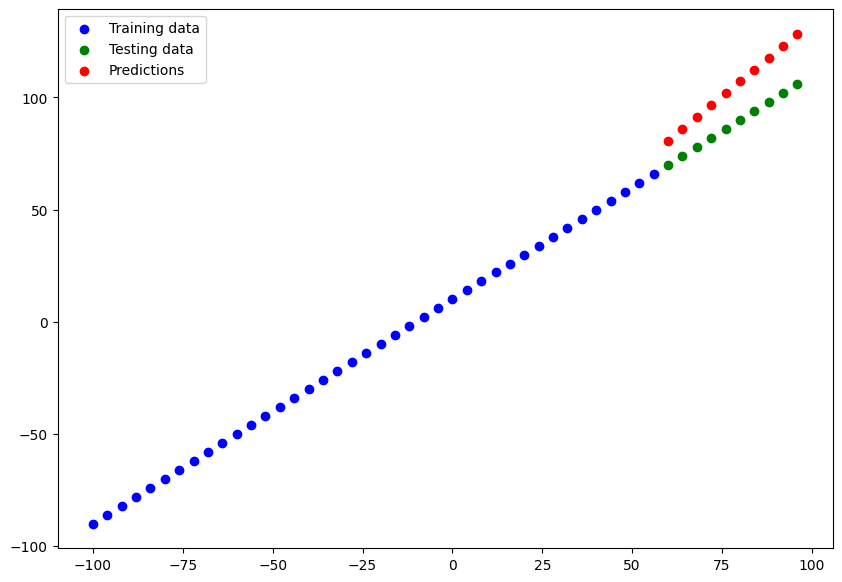

In [48]:
#Make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [49]:
mae_2 = tf.keras.metrics.MeanAbsoluteError()(y_test,y_pred_2)
mse_2 = tf.keras.metrics.MeanSquaredError()(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=16.492334365844727>,
 <tf.Tensor: shape=(), dtype=float32, numpy=286.16461181640625>)

In [50]:
#Build model_3  2 layers trainen for 500 epochs
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 24.5627 - mse: 985.7391 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.9787 - mse: 702.2975
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.3888 - mse: 622.5651
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 18.2101 - mse: 456.8046
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.5754 - mse: 378.2263
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.5172 - mse: 370.2114
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.8622 - mse: 223.2573
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.7392 - mse: 304.4181
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.5778 - mse: 329.1462
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.6768 - mse: 213.0692
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.6462 - mse: 298.1955
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.6987 - mse: 331.9313
Epoch 13/500

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


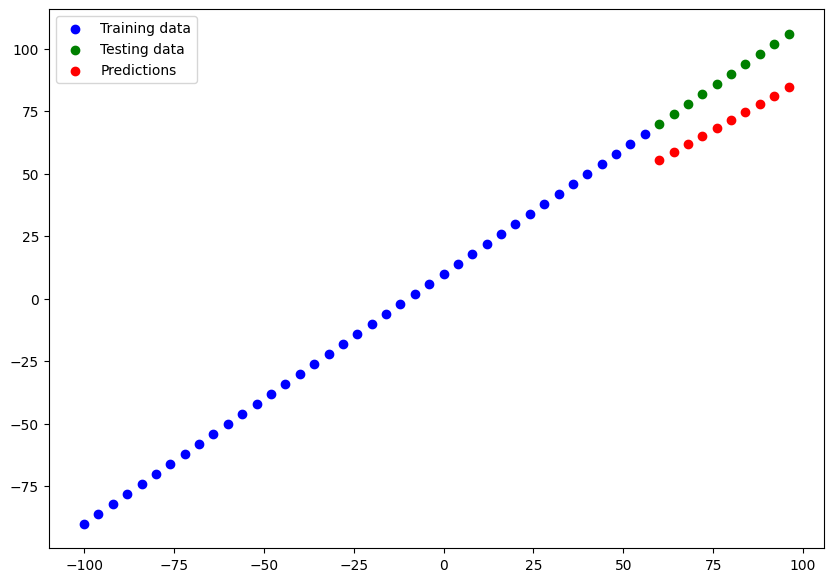

In [51]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [52]:
mae_3 = tf.keras.metrics.MeanAbsoluteError()(y_test,y_pred_3)
mse_3 = tf.keras.metrics.MeanSquaredError()(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=18.052499771118164>,
 <tf.Tensor: shape=(), dtype=float32, numpy=330.6620178222656>)

In [53]:
import pandas as pd

model_results  = [["model_1",mae_1.numpy(),mse_1.numpy()],
                  ["model_2",mae_2.numpy(),mse_2.numpy()],
                  ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,19.153477,369.270996
1,model_2,16.492334,286.164612
2,model_3,18.052500,330.662018


In [54]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [55]:
#One of our main goals should be to minimize time between experiments.The more experiment you do the more things you'll figure out  which don't work

## Saving our models

1. TheSavedModel format
2. The HDF5 format

In [56]:
model_2.save("best_model.keras")
# yüklemek için:
from tensorflow import keras
model = keras.models.load_model("best_model.keras")

In [57]:
model_2.save("best_model.h5", include_optimizer=True)  # include_optimizer=True ise optimizer durumu da saklanır(ogrenmeye kaldigi yerden devam etme durumu)

In [58]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [59]:
#Compare model_2 predictions with savedmodel format model predictions
model_2_preds = model_2.predict(X_test)
model_preds = model.predict(X_test)
model_2_preds == model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [60]:
loaded = keras.models.load_model("best_model.h5")

In [61]:
#Check to see predictions match or not with model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_preds = loaded.predict(X_test)
model_2_preds ==loaded_h5_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or any other file from google colab

1. You can go to the files tab and right click on the file you're after and click "download".
2. Use code

In [62]:
from google.colab import files
files.download("/content/best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>